In [1]:
import cv2
import numpy as np
import imutils
import matplotlib.pyplot as plt
print("Versão OpenCV: ", cv2.__version__)

Versão OpenCV:  4.2.0


In [2]:
!ls figs

baby.png      hero.png				j.png	      sudoku.jpg
blobs.png     HubIA_Poligonos_data_cultura.csv	logo.png      tetris.png
cinza.jpg     imgTeste.jpg			messi5.jpg
cinzaout.jpg  JP2.jpg				noisy.jpg
degrade.png   JP.jpeg				simpsons.png


In [3]:
img = cv2.imread("/home/wana/wbb/Aula/DL-parceiros-me/figs/imgTeste.jpg")
#print(img)

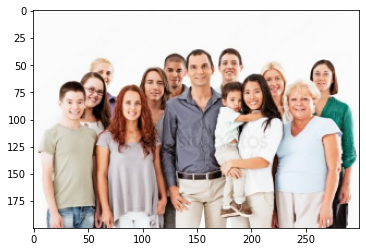

In [4]:
img_resized = cv2.resize(img, (300,200))
img_resized = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)
plt.imshow(img_resized)

In [5]:
img_resized.shape

(200, 300, 3)

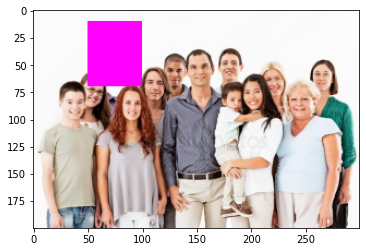

In [6]:
img_resized[10:70,50:100] = [255,0,255]
plt.imshow(img_resized)

In [7]:
img_cinza = cv2.imread("/home/wana/wbb/Aula/DL-parceiros-me/figs/cinza.jpg")
#print(img)

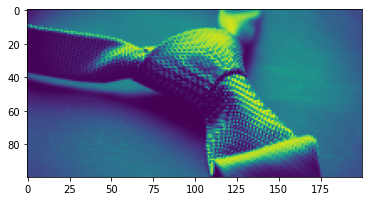

In [8]:
img_cinza = cv2.resize(img_cinza, (200,100))
img_cinza = cv2.cvtColor(img_cinza, cv2.COLOR_BGR2GRAY)
plt.imshow(img_cinza)

In [9]:
roi = img_resized[60:100, 20:50]

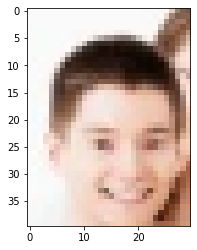

In [10]:
plt.imshow(roi)

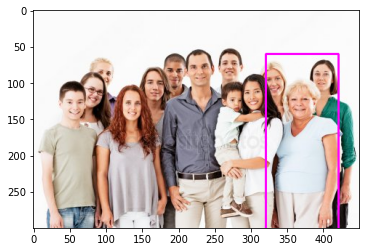

In [11]:
output = img.copy()
cv2.rectangle(output, (320, 60), (420, 1600), (255,0,255), 2)
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))

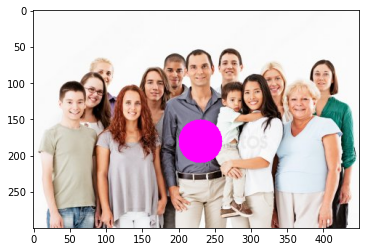

In [12]:
output = img.copy()
cv2.circle(output, (230, 180), 30, (255, 0, 255), -1)
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))

# Exercício:

* Abra a imagem figs/messi5.jpg
* recorte a bola
* copie em outra parte da imagem
* rotacione a imagem em 60 graus
* Altere o tamanho da imagem mantendo a proporção


In [13]:
img_messi = cv2.imread("/home/wana/wbb/Aula/DL-parceiros-me/figs/messi5.jpg")
#print(img)

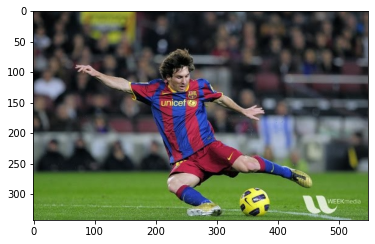

In [14]:
#img_cinza = cv2.cvtColor(img_cinza, cv2.COLOR_BGR2GRAY)
img_messi = cv2.cvtColor(img_messi, cv2.COLOR_BGR2RGB)
plt.imshow(img_messi)

In [15]:
img_messi.shape
copy = img_messi.copy()

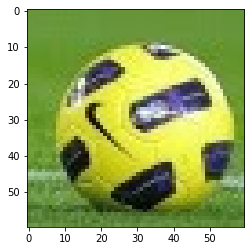

In [16]:
roi = copy[280:340, 330:390]
plt.imshow(roi)

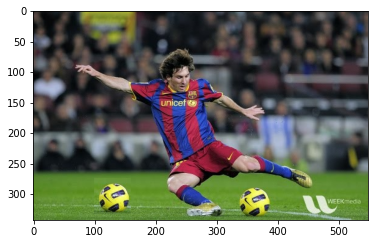

In [17]:
copy[273:333, 100:160] = roi
plt.imshow(copy)

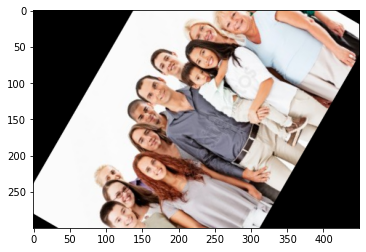

In [18]:
rows,cols,channels = img.shape


rot = cv2.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0),60,1)

dst = cv2.warpAffine(img,rot,(cols,rows))

plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))

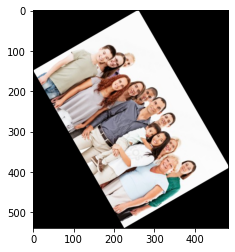

In [19]:
rotated = imutils.rotate_bound(img, 60)

plt.imshow(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB))


Original Dimensions :  (300, 450, 3)
Novas dimensões :  (180, 270, 3)


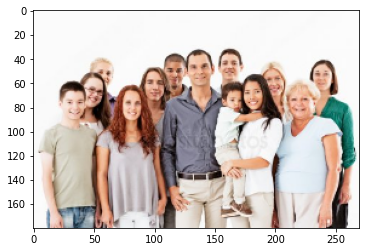

In [20]:
print('Original Dimensions : ',img.shape)
 
scale_percent = 60 # porcentagem da imagem original
w = int(img.shape[1] * scale_percent / 100)
h = int(img.shape[0] * scale_percent / 100)
dim = (w, h)

# resize image
resized = cv2.resize(img,dim)
 
print('Novas dimensões : ',resized.shape)
plt.imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB))
plt.show()

# Exercício 2:

   * Avalie o uso de filtros para eliminar ruídos e detectar contornos na imagem figs/11.jpg
   * Utilize os padrões definidos em https://github.com/opencv/opencv/tree/master/data/haarcascades para criar dois classificadores, teste os classificadores com imagens aleatórias


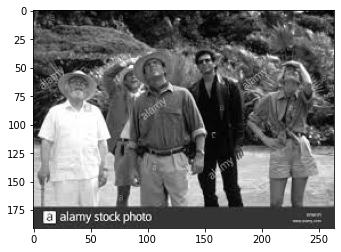

In [21]:
# Convert the image to grayscale
img2 = cv2.imread('./figs/JP.jpeg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
plt.imshow(img2, cmap="gray")

In [22]:
# Adaptive Thresholding
_, thresh_binary = cv2.threshold(img2, thresh = 127, maxval = 255, type = cv2.THRESH_BINARY)
adap_mean_2 = cv2.adaptiveThreshold(img2, 255, 
                                    cv2.ADAPTIVE_THRESH_MEAN_C, 
                                    cv2.THRESH_BINARY, 7, 2)
adap_mean_2_inv = cv2.adaptiveThreshold(img2, 255, 
                                        cv2.ADAPTIVE_THRESH_MEAN_C, 
                                        cv2.THRESH_BINARY_INV, 7, 2)
adap_mean_8 = cv2.adaptiveThreshold(img2, 255, 
                                    cv2.ADAPTIVE_THRESH_MEAN_C, 
                                    cv2.THRESH_BINARY, 7, 8)
adap_gaussian_8 = cv2.adaptiveThreshold(img2, 255, 
                                    cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                    cv2.THRESH_BINARY, 7, 8)

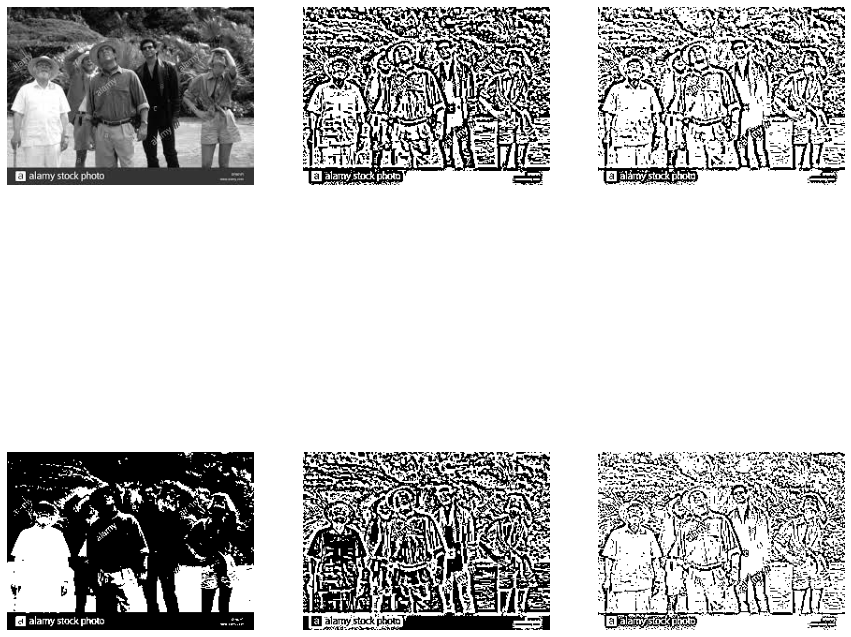

In [23]:
# Plot the images
images = [img2, thresh_binary, adap_mean_2, adap_mean_2_inv, 
          adap_mean_8, adap_gaussian_8]
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 15))
for ind, p in enumerate(images):
    ax = axs[ind%2, ind//2]
    ax.imshow(p, cmap = 'gray')
    ax.axis('off')
plt.show()

In [24]:
blur3 = cv2.blur(img2,(3,3),0)
blur5 = cv2.blur(img2,(5,5),0)

edges3 = cv2.Canny(blur3,100,200)
edges5 = cv2.Canny(blur5,100,200)

In [25]:
lista = [img2, blur3, blur5, edges3,edges5]
titles = ["original", "blur 3x3", "blur 5X5", "edges-blur 3x3", "edges-blur 5x5"]
# Percorre todos os arquivos do diretório
def plot(n):
    plt.figure(figsize=(15,7))
    for i in range(n):
        # Categoria é obtida a partir do nome do arquivo
        plt.subplot(230+1+i)
        #new = cv2.resize(lista[i], dsize=(300, 300))
        plt.imshow(lista[i], cmap="gray")
        plt.title(titles[i])
        plt.axis('off')
    # show the figure
    plt.suptitle("Filters")
    #plt.subplots_adjust(hspace=0.5, wspace=0.5)
    plt.show()

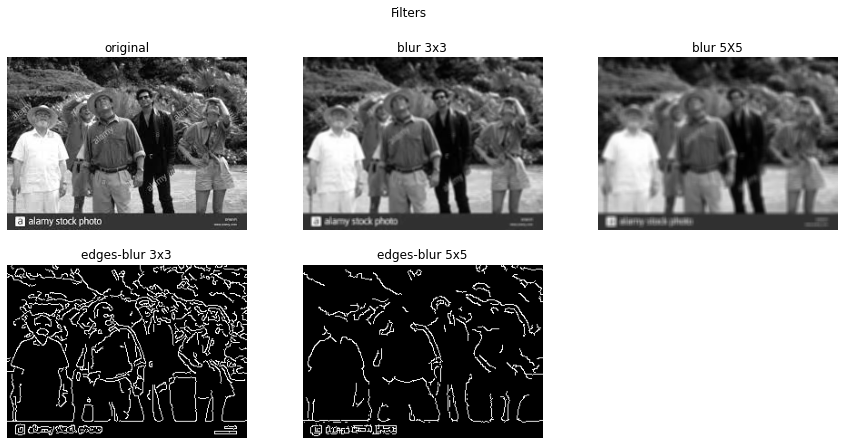

In [26]:
plot(len(lista))

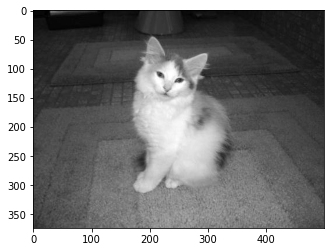

In [27]:
cat = cv2.imread('./haarcascade/cat.jpg')
catgray = cv2.cvtColor(cat, cv2.COLOR_BGR2GRAY)
plt.imshow(catgray,cmap="gray")


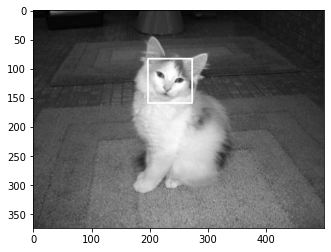

In [28]:
#cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
facecat = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalcatface.xml")

facecats = facecat.detectMultiScale(catgray, 1.05,3)
for (x,y,w,h) in facecats:
    out2=cv2.rectangle(catgray,(x,y),(x+w,y+h),(255,0,0),2)
#cv2.imwrite("out.jpg", out)
plt.imshow(out2,cmap="gray")